<a href="https://colab.research.google.com/github/Spyrx4/analisis_sentimen_merahputih_oneforall/blob/main/notebook/Proses_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import string
import nltk
import html
import warnings
warnings.filterwarnings('ignore')

In [398]:
df = pd.read_csv('../data/smerahputih_oneforall.csv')

In [399]:
df.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T15:38:07Z,@mesamaki,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment
1,2025-08-27T06:34:43Z,@joymaradona7695,Ketawa mu jelek pisan mas,0,comment
2,2025-08-24T23:13:27Z,@untunggratis,"Sebenarnya VO nya Okeh-okeh Aja, Yang Sangat D...",0,comment
3,2025-08-24T11:07:08Z,@rezarahmaddhitya,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment
4,2025-08-24T03:50:03Z,@kazutoai3940,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment


In [400]:
df

,publishedAt,authorDisplayName,textDisplay,likeCount,type
0,2025-08-28T15:38:07Z,@mesamaki,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment
1,2025-08-27T06:34:43Z,@joymaradona7695,Ketawa mu jelek pisan mas,0,comment
2,2025-08-24T23:13:27Z,@untunggratis,"Sebenarnya VO nya Okeh-okeh Aja, Yang Sangat D...",0,comment
3,2025-08-24T11:07:08Z,@rezarahmaddhitya,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment
4,2025-08-24T03:50:03Z,@kazutoai3940,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,comment
...,...,...,...,...,...
8687,2025-08-11T08:57:24Z,@prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6,reply
8688,2025-08-15T09:15:28Z,@dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2,reply
8689,2025-08-15T23:23:43Z,@matthewbrealey2026,@@prod.starlight masuk di XXI loh,0,reply
8690,2025-08-09T04:07:03Z,@robbycarnando4512,Pengisi suara ny spa aj yahhh...,1,comment


In [401]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])


# Pisahkan menjadi dua kolom: tanggal dan waktu
df['tanggal'] = df['publishedAt'].dt.date
df['jam'] = df['publishedAt'].dt.time

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   publishedAt        8692 non-null   datetime64[ns, UTC]
 1   authorDisplayName  8690 non-null   object             
 2   textDisplay        8692 non-null   object             
 3   likeCount          8692 non-null   int64              
 4   type               8692 non-null   object             
 5   tanggal            8692 non-null   object             
 6   jam                8692 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 475.5+ KB


In [403]:
# clean data kolom authordisplayname
def clean_text(name):
    name = re.sub(r'^@', '', name)
    name = name.lower()
    return name

In [405]:
df['authorDisplayName'] = df['authorDisplayName'].astype(str)

In [406]:
df['username'] = df['authorDisplayName'].apply(clean_text)

In [407]:
df  = pd.DataFrame(df[['tanggal','jam','username','textDisplay','likeCount']])

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      8692 non-null   object
 1   jam          8692 non-null   object
 2   username     8692 non-null   object
 3   textDisplay  8692 non-null   object
 4   likeCount    8692 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 339.7+ KB


In [409]:
# melihat data duplicate
df[df.duplicated(subset='textDisplay')]

,tanggal,jam,username,textDisplay,likeCount
487,2025-08-13,06:26:19,mckyemccandless,Bagusan animasinya CIPUNG ABUBU 😂😂😂,0
606,2025-08-26,08:18:31,jazendanke3609,"133,579 views 16 Aug 2025\r<br>In this video,...",1
610,2025-08-26,08:19:31,jazendanke3609,"133,579 views 16 Aug 2025\r<br>In this video,...",1
693,2025-08-12,17:29:02,agusprabowo4027,gangerti lagi,0
762,2025-08-12,14:43:29,goeriangtoejoeh,Kurang lagu seventeen th... Awokawokawok,0
...,...,...,...,...,...
8571,2025-08-16,10:33:31,azkaalfaizi-d4n,😂😂,0
8581,2025-08-10,05:28:21,dutsukodutsu6117,😂😂😂😂,0
8596,2025-08-09,23:18:36,agegabut,Wtf,0
8659,2025-08-14,11:51:19,kembaraisyanisa,Apakah bajetnya di ???,1


In [410]:
df.drop_duplicates(subset ="textDisplay", keep = 'first', inplace=True)

In [411]:
df.duplicated().sum()

np.int64(0)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8532 entries, 0 to 8691
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      8532 non-null   object
 1   jam          8532 non-null   object
 2   username     8532 non-null   object
 3   textDisplay  8532 non-null   object
 4   likeCount    8532 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 399.9+ KB


In [413]:
# mencari apakah ada data kosong
df.isnull().sum()

tanggal        0
jam            0
username       0
textDisplay    0
likeCount      0
dtype: int64

In [414]:
text = ' '.join(df['textDisplay'])

In [415]:
from collections import Counter

tokens = text.split()
word_counts = Counter(tokens)

In [416]:
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

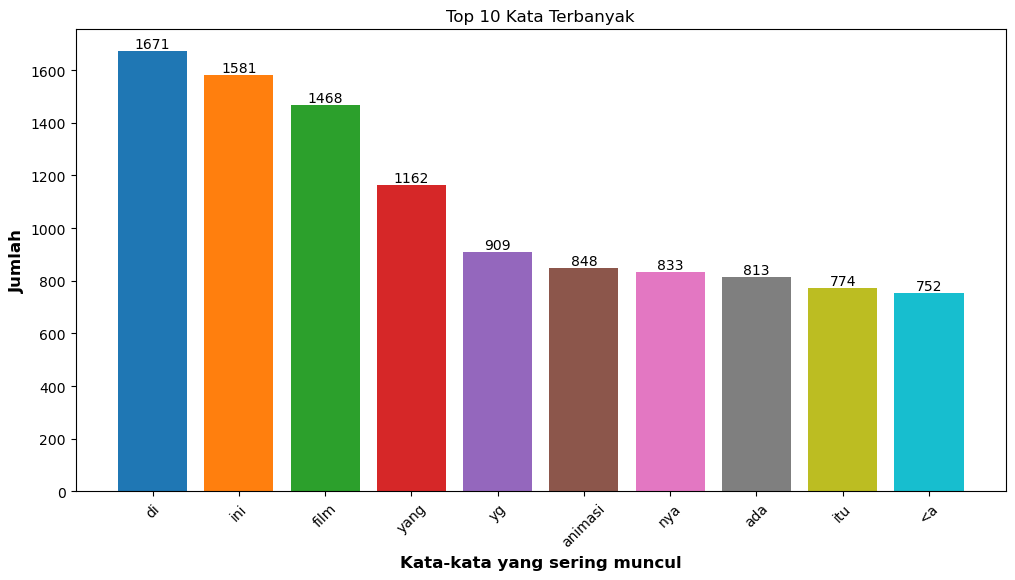

In [417]:
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel('Kata-kata yang sering muncul', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Kata Terbanyak')

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(num), ha='center', va='bottom', fontsize=10)

plt.show()

In [418]:
df

,tanggal,jam,username,textDisplay,likeCount
0,2025-08-28,15:38:07,mesamaki,"<a href=""https://www.youtube.com/watch?v=ORu80...",0
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0
2,2025-08-24,23:13:27,untunggratis,"Sebenarnya VO nya Okeh-okeh Aja, Yang Sangat D...",0
3,2025-08-24,11:07:08,rezarahmaddhitya,"<a href=""https://www.youtube.com/watch?v=ORu80...",0
4,2025-08-24,03:50:03,kazutoai3940,"<a href=""https://www.youtube.com/watch?v=ORu80...",0
...,...,...,...,...,...
8687,2025-08-11,08:57:24,prod.starlight,​@@JustAnOrd1naryMankok XXI gaada trailer sih?...,6
8688,2025-08-15,09:15:28,dikaalvin657,Kalau fulus<br>Pasti mulus<br>😂😂😂,2
8689,2025-08-15,23:23:43,matthewbrealey2026,@@prod.starlight masuk di XXI loh,0
8690,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh...,1


In [419]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        # hapus tag html
        html_pattern = re.compile(r'<.*?>')
        cleaned_tweet = html_pattern.sub(r'', tweet)

        # Langkah 2: Dekode entitas HTML (misalnya &quot; menjadi ")
        cleaned_tweet = html.unescape(cleaned_tweet)

        # Ganti tanda titik dengan spasi
        cleaned_tweet = cleaned_tweet.replace('.', ' ')

        # Hapus tanda baca lainnya
        punctuation_pattern = re.compile(f"[{re.escape(string.punctuation)}]")
        cleaned_tweet = punctuation_pattern.sub(r'', cleaned_tweet)

        return cleaned_tweet
    else:
        return tweet

In [420]:
# fungsi menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F700-\U0001F77F"  # alchemical symbols
            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            "\U0001FA00-\U0001FA6F"  # Chess Symbols
            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "\U00002702-\U000027B0"  # Additional emoticons (Dingbats)
            "\U000024C2-\U0001F251"  # Miscellaneous Symbols and Pictographs
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)

        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [421]:
# fungsi menghapus simbol
def remove_symbols(tweet):
  if tweet is not None and isinstance(tweet, str):
      tweet = re.sub(r'[^a-zA-Z0-0\s]', ' ', tweet)
  return tweet

In [422]:
# fungsi menghapus angka
def remove_number(tweet):
  if tweet is not None and isinstance(tweet, str):
    tweet = re.sub(r'\d+', '', tweet)
  return tweet

In [423]:
# hapus hastag
def hapus_hastag(teks):
  return re.sub(r'#\w+', '', teks).strip()

In [424]:

df['komentarBaru'] = df['textDisplay'].apply(lambda x: remove_html(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_emoji(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_symbols(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: remove_number(x))
df['komentarBaru'] = df['komentarBaru'].apply(lambda x: hapus_hastag(x))
# df['komentarBaru'] = df['komentarBaru'].apply(remove_number)

df.head(10)

,tanggal,jam,username,textDisplay,likeCount,komentarBaru
0,2025-08-28,15:38:07,mesamaki,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,lebay banget dah itu org cuma cerita kalo dia ...
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,Ketawa mu jelek pisan mas
2,2025-08-24,23:13:27,untunggratis,"Sebenarnya VO nya Okeh-okeh Aja, Yang Sangat D...",0,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...
3,2025-08-24,11:07:08,rezarahmaddhitya,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,unjuk tetong bejirr
4,2025-08-24,03:50:03,kazutoai3940,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,bang jangankan bulan one Piece aja anime wee...
5,2025-08-22,20:00:11,lovendearest,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,bukan tiket gala premier sih tapi gue liat tw...
6,2025-08-22,19:41:00,lovendearest,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,ga yang gue tangkep dari kata kualitas animasi...
7,2025-08-22,19:12:11,lovendearest,&quot;film animasi pertama yg menceritakan ten...,0,film animasi pertama yg menceritakan tentang k...
8,2025-08-22,14:24:13,desimoyyyyy,Yg bagian wawancara sm eksekutip produsernya i...,0,Yg bagian wawancara sm eksekutip produsernya i...
9,2025-08-22,08:04:45,rizky5961,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,sudah jelas itu karakter beli bukan bikin krea...


In [ ]:
# menghitung

In [425]:
# proses case folding
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['komentarBaru'].apply(case_folding)
df.head(10)


,tanggal,jam,username,textDisplay,likeCount,komentarBaru,case_folding
0,2025-08-28,15:38:07,mesamaki,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,lebay banget dah itu org cuma cerita kalo dia ...,lebay banget dah itu org cuma cerita kalo dia ...
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,Ketawa mu jelek pisan mas,ketawa mu jelek pisan mas
2,2025-08-24,23:13:27,untunggratis,"Sebenarnya VO nya Okeh-okeh Aja, Yang Sangat D...",0,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,sebenarnya vo nya okehokeh aja yang sangat dis...
3,2025-08-24,11:07:08,rezarahmaddhitya,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,unjuk tetong bejirr,unjuk tetong bejirr
4,2025-08-24,03:50:03,kazutoai3940,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,bang jangankan bulan one Piece aja anime wee...,bang jangankan bulan one piece aja anime wee...
5,2025-08-22,20:00:11,lovendearest,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,bukan tiket gala premier sih tapi gue liat tw...,bukan tiket gala premier sih tapi gue liat tw...
6,2025-08-22,19:41:00,lovendearest,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,ga yang gue tangkep dari kata kualitas animasi...,ga yang gue tangkep dari kata kualitas animasi...
7,2025-08-22,19:12:11,lovendearest,&quot;film animasi pertama yg menceritakan ten...,0,film animasi pertama yg menceritakan tentang k...,film animasi pertama yg menceritakan tentang k...
8,2025-08-22,14:24:13,desimoyyyyy,Yg bagian wawancara sm eksekutip produsernya i...,0,Yg bagian wawancara sm eksekutip produsernya i...,yg bagian wawancara sm eksekutip produsernya i...
9,2025-08-22,08:04:45,rizky5961,"<a href=""https://www.youtube.com/watch?v=ORu80...",0,sudah jelas itu karakter beli bukan bikin krea...,sudah jelas itu karakter beli bukan bikin krea...


In [427]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

data  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount']])

In [428]:
data

,tanggal,jam,username,komentarBaru,likeCount
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0
...,...,...,...,...,...
8687,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6
8688,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2
8689,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0
8690,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh,1


In [ ]:
# # Unduh dan baca kamus dari GitHub
# url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
# response = requests.get(url)
# file_excel = BytesIO(response.content)
# kamus_data = pd.read_excel(file_excel)

kamus_data = pd.read_csv('../data/kamuskatabaku.csv')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [429]:
# Terapkan fungsi normalisasi
df[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = df['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df  = pd.DataFrame(df[['tanggal','jam','username','komentarBaru','likeCount', 'case_folding','normalisasi']])
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...


In [430]:
df.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi
8253,2025-08-14,07:33:57,zamprut-f1v,berasa banget aura korupnya M udah kyk,0,berasa banget aura korupnya m udah kyk,berasa sangat aura korupnya sama sudah seperti
4677,2025-08-22,09:48:10,kimmy_lilyya,milyar bikin mata sakit anj,0,milyar bikin mata sakit anj,milyar membuat mata sakit anjing
5589,2025-08-19,02:37:16,adisukrisno5389,kenapa ada sn jata aduh kebelet eek,1,kenapa ada sn jata aduh kebelet eek,kenapa ada sn jata aduh kebelet eek
4327,2025-08-24,09:44:24,brrraedd,Filmnya hanya malu maluin indonesia Harganya b...,0,filmnya hanya malu maluin indonesia harganya b...,filmnya hanya malu maluin indonesia harganya m...
4146,2025-08-26,01:53:22,eas.emergency,Berhenti Jangan Korupsi,0,berhenti jangan korupsi,berhenti jangan korupsi
177,2025-08-14,15:35:41,alphanzzsophyan1058,ada masker gas di gudangnya di paling atas,0,ada masker gas di gudangnya di paling atas,ada masker gas di gudangnya di paling atas
7176,2025-08-16,01:25:48,ainanuraulia1548,Vidio jelek gini mau di tayang di bioskop ngar...,0,vidio jelek gini mau di tayang di bioskop ngar...,vidio jelek begini mau di tayang di bioskop me...
6355,2025-08-17,11:21:12,alyssasmith-et5jm,Pastinya Dananya Dikorup,0,pastinya dananya dikorup,pastinya dananya dikorup
6586,2025-08-17,01:42:28,stickwar222,Wajar lah di ambil dari dark web,0,wajar lah di ambil dari dark web,wajar lah di ambil dari dark web
771,2025-08-12,14:23:11,yuttaamlbb,plot twist nya bang itu trailer tipuan pas ril...,0,plot twist nya bang itu trailer tipuan pas ril...,plot twist nya abang itu trailer tipuan pas ri...


In [431]:
# tokenization
def tokenize(text):
  tokens = text.split()
  return tokens
df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...,"[lebay, sangat, sudah, itu, orang, cuma, cerit..."
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas,"[ketawa, mu, jelek, pisan, mas]"
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...,"[sebenarnya, vo, nya, okehokeh, saja, yang, sa..."
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr,"[unjuk, tetong, bejirr]"
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...,"[abang, jangankan, bulan, one, piece, saja, an..."


In [432]:
# proses stopword removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words(['indonesian'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [433]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head(5)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...,"[lebay, sangat, sudah, itu, orang, cuma, cerit...","[lebay, orang, cerita, suka, film, kartun, ban..."
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas,"[ketawa, mu, jelek, pisan, mas]","[ketawa, mu, jelek, pisan, mas]"
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...,"[sebenarnya, vo, nya, okehokeh, saja, yang, sa...","[vo, nya, okehokeh, disayangkan, animasinya]"
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr,"[unjuk, tetong, bejirr]","[unjuk, tetong, bejirr]"
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...,"[abang, jangankan, bulan, one, piece, saja, an...","[abang, one, piece, anime, weekly, mingguan, b..."


In [ ]:
# Proses steaming data
!pip install Sastrawi

In [434]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [435]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)


,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...,"[lebay, sangat, sudah, itu, orang, cuma, cerit...","[lebay, orang, cerita, suka, film, kartun, ban...",lebay orang cerita suka film kartun banding ba...
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas,"[ketawa, mu, jelek, pisan, mas]","[ketawa, mu, jelek, pisan, mas]",ketawa mu jelek pis mas
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...,"[sebenarnya, vo, nya, okehokeh, saja, yang, sa...","[vo, nya, okehokeh, disayangkan, animasinya]",vo nya okehokeh sayang animasi
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr,"[unjuk, tetong, bejirr]","[unjuk, tetong, bejirr]",unjuk tetong bejirr
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...,"[abang, jangankan, bulan, one, piece, saja, an...","[abang, one, piece, anime, weekly, mingguan, b...",abang one piece anime weekly minggu bagus pali...


In [436]:
df

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...,"[lebay, sangat, sudah, itu, orang, cuma, cerit...","[lebay, orang, cerita, suka, film, kartun, ban...",lebay orang cerita suka film kartun banding ba...
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas,"[ketawa, mu, jelek, pisan, mas]","[ketawa, mu, jelek, pisan, mas]",ketawa mu jelek pis mas
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...,"[sebenarnya, vo, nya, okehokeh, saja, yang, sa...","[vo, nya, okehokeh, disayangkan, animasinya]",vo nya okehokeh sayang animasi
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr,"[unjuk, tetong, bejirr]","[unjuk, tetong, bejirr]",unjuk tetong bejirr
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...,"[abang, jangankan, bulan, one, piece, saja, an...","[abang, one, piece, anime, weekly, mingguan, b...",abang one piece anime weekly minggu bagus pali...
...,...,...,...,...,...,...,...,...,...,...
8687,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"[justanord, narymankok, xxi, trailer, sih, gam...","[justanord, narymankok, xxi, trailer, sih, gam...",justanord narymankok xxi trailer sih gamasuk x...
8688,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"[kalau, fuluspasti, mulus]","[fuluspasti, mulus]",fuluspasti mulus
8689,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"[prod, starlight, masuk, di, xxi, loh]","[prod, starlight, masuk, xxi, loh]",prod starlight masuk xxi loh
8690,2025-08-09,04:07:03,robbycarnando4512,Pengisi suara ny spa aj yahhh,1,pengisi suara ny spa aj yahhh,pengisi suara nya spa saja ya,"[pengisi, suara, nya, spa, saja, ya]","[pengisi, suara, nya, spa, ya]",isi suara nya spa ya


In [437]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8532 entries, 0 to 8691
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           8532 non-null   object
 1   jam               8532 non-null   object
 2   username          8532 non-null   object
 3   komentarBaru      8532 non-null   object
 4   likeCount         8532 non-null   int64 
 5   case_folding      8532 non-null   object
 6   normalisasi       8532 non-null   object
 7   tokenize          8532 non-null   object
 8   stopword removal  8532 non-null   object
 9   stemming          8532 non-null   object
dtypes: int64(1), object(9)
memory usage: 733.2+ KB


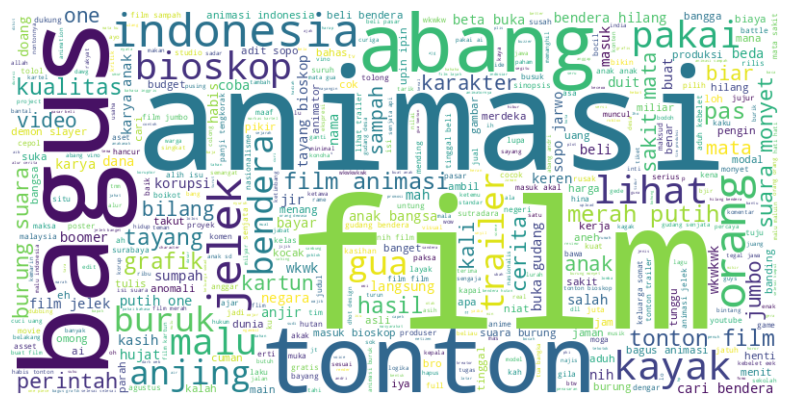

In [438]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Menggabungkan teks dari kolom 'steming_data'
text = ' '.join(df['stemming'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','kak','deh','fyp', 'ya', 'gue', 'sih','yg','nya','aja','sdh','gak','ga','dm'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

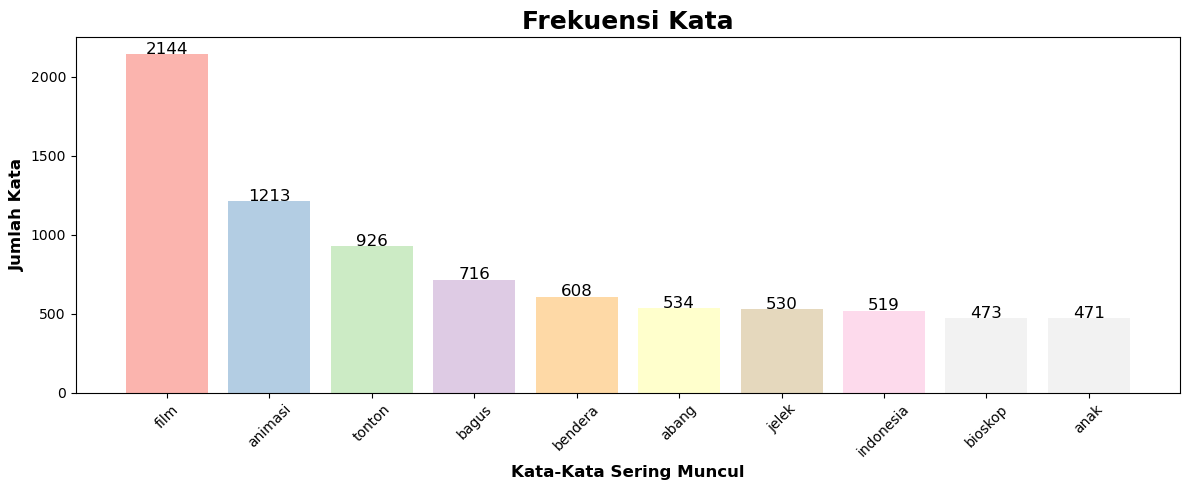

In [439]:
from collections import Counter
from wordcloud import STOPWORDS

all_text = ' '.join(df["stemming"].astype(str))
all_words = all_text.split()


stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'kak', 'deh', 'fyp', 'ya', 'gue', 'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','dm'])

filtered_words = [word for word in all_words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.Pastel1(range(len(word)))

# Plot
plt.figure(figsize=(12, 5))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tampilkan jumlah di atas bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.tight_layout()
plt.show()

In [477]:
df.to_csv('../data/Hasil_Preprocessing_Data.csv',encoding='utf8', index=False)

In [478]:
data = pd.read_csv('../data/Hasil_Preprocessing_Data.csv')

In [ ]:
data.sample(10)

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming
163,2025-08-26,10:39:08,hannyssss,Duniya bukan maju malah mudur sama suaranya be...,1,duniya bukan maju malah mudur sama suaranya be...,duniya bukan maju malah mudur sama suaranya be...,"['duniya', 'bukan', 'maju', 'malah', 'mudur', ...","['duniya', 'maju', 'mudur', 'suaranya', 'beday...",duniya maju mudur suara bedaya burung suara mo...
3645,2025-08-15,03:09:07,somasja,Bikin kok gini,0,bikin kok gini,membuat kok begini,"['membuat', 'kok', 'begini']",[],NaN
65,2025-08-27,12:41:52,fitrirusdiana3840,kartel jir,0,kartel jir,kartel jir,"['kartel', 'jir']","['kartel', 'jir']",kartel jir
4380,2025-08-14,04:23:41,yotoyusup290,ini serius tayang di bioskopmalu sama upin ipi...,0,ini serius tayang di bioskopmalu sama upin ipi...,ini serius tayang di bioskopmalu sama upin ipi...,"['ini', 'serius', 'tayang', 'di', 'bioskopmalu...","['serius', 'tayang', 'bioskopmalu', 'upin', 'i...",serius tayang bioskopmalu upin ipin oii
1544,2025-08-19,06:54:38,farisghalib7695,Ooooo ini film Kirain tugas kelompok SMK,0,ooooo ini film kirain tugas kelompok smk,ooooo ini film mengira tugas kelompok smk,"['ooooo', 'ini', 'film', 'mengira', 'tugas', '...","['ooooo', 'film', 'tugas', 'kelompok', 'smk']",ooooo film tugas kelompok smk
2718,2025-08-16,14:48:27,mamiemka6021,NaN,0,NaN,NaN,[],[],NaN
3486,2025-08-15,08:56:39,vaelstromzy,pakai duit miliaran cuma untuk ini sybau,1,pakai duit miliaran cuma untuk ini sybau,pakai duit miliaran cuma untuk ini sybau,"['pakai', 'duit', 'miliaran', 'cuma', 'untuk',...","['pakai', 'duit', 'miliaran', 'sybau']",pakai duit miliar sybau
2294,2025-08-17,13:29:03,ratnasetiawati1640,Sybau,0,sybau,sybau,['sybau'],['sybau'],sybau
3707,2025-08-15,00:38:35,keepclickin.,Acara agustus di markas opm,2,acara agustus di markas opm,acara agustus di markas opm,"['acara', 'agustus', 'di', 'markas', 'opm']","['acara', 'agustus', 'markas', 'opm']",acara agustus markas opm
2811,2025-08-16,11:19:11,herdiansyahesc8667,Haduhhh,0,haduhhh,haduhhh,['haduhhh'],['haduhhh'],haduhhh


In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           8532 non-null   object
 1   jam               8532 non-null   object
 2   username          8530 non-null   object
 3   komentarBaru      8431 non-null   object
 4   likeCount         8532 non-null   int64 
 5   case_folding      8431 non-null   object
 6   normalisasi       8430 non-null   object
 7   tokenize          8532 non-null   object
 8   stopword removal  8532 non-null   object
 9   stemming          8359 non-null   object
dtypes: int64(1), object(9)
memory usage: 666.7+ KB


In [480]:
data.isna().sum()

tanggal               0
jam                   0
username              2
komentarBaru        101
likeCount             0
case_folding        101
normalisasi         102
tokenize              0
stopword removal      0
stemming            173
dtype: int64

In [481]:
data.dropna(inplace=True)

In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8357 entries, 0 to 8530
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tanggal           8357 non-null   object
 1   jam               8357 non-null   object
 2   username          8357 non-null   object
 3   komentarBaru      8357 non-null   object
 4   likeCount         8357 non-null   int64 
 5   case_folding      8357 non-null   object
 6   normalisasi       8357 non-null   object
 7   tokenize          8357 non-null   object
 8   stopword removal  8357 non-null   object
 9   stemming          8357 non-null   object
dtypes: int64(1), object(9)
memory usage: 718.2+ KB


In [483]:
# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("../data/positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("../data/negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments

data['sentiment'] = data['stemming'].apply(determine_sentiment)
data['sentiment'] = replace_none_sentiment(data['sentiment'].tolist())

In [484]:
data

,tanggal,jam,username,komentarBaru,likeCount,case_folding,normalisasi,tokenize,stopword removal,stemming,sentiment
0,2025-08-28,15:38:07,mesamaki,lebay banget dah itu org cuma cerita kalo dia ...,0,lebay banget dah itu org cuma cerita kalo dia ...,lebay sangat sudah itu orang cuma cerita kalau...,"['lebay', 'sangat', 'sudah', 'itu', 'orang', '...","['lebay', 'orang', 'cerita', 'suka', 'film', '...",lebay orang cerita suka film kartun banding ba...,Negatif
1,2025-08-27,06:34:43,joymaradona7695,Ketawa mu jelek pisan mas,0,ketawa mu jelek pisan mas,ketawa mu jelek pisan mas,"['ketawa', 'mu', 'jelek', 'pisan', 'mas']","['ketawa', 'mu', 'jelek', 'pisan', 'mas']",ketawa mu jelek pis mas,Positif
2,2025-08-24,23:13:27,untunggratis,Sebenarnya VO nya Okehokeh Aja Yang Sangat Dis...,0,sebenarnya vo nya okehokeh aja yang sangat dis...,sebenarnya vo nya okehokeh saja yang sangat di...,"['sebenarnya', 'vo', 'nya', 'okehokeh', 'saja'...","['vo', 'nya', 'okehokeh', 'disayangkan', 'anim...",vo nya okehokeh sayang animasi,Negatif
3,2025-08-24,11:07:08,rezarahmaddhitya,unjuk tetong bejirr,0,unjuk tetong bejirr,unjuk tetong bejirr,"['unjuk', 'tetong', 'bejirr']","['unjuk', 'tetong', 'bejirr']",unjuk tetong bejirr,Negatif
4,2025-08-24,03:50:03,kazutoai3940,bang jangankan bulan one Piece aja anime wee...,0,bang jangankan bulan one piece aja anime wee...,abang jangankan bulan one piece saja anime wee...,"['abang', 'jangankan', 'bulan', 'one', 'piece'...","['abang', 'one', 'piece', 'anime', 'weekly', '...",abang one piece anime weekly minggu bagus pali...,Positif
...,...,...,...,...,...,...,...,...,...,...,...
8526,2025-08-09,12:20:23,justanord1naryman,Dari pemerintah bro membangkang auto hilang,13,dari pemerintah bro membangkang auto hilang,dari pemerintah bro membangkang auto hilang,"['dari', 'pemerintah', 'bro', 'membangkang', '...","['pemerintah', 'bro', 'membangkang', 'auto', '...",perintah bro bangkang auto hilang,Negatif
8527,2025-08-11,08:57:24,prod.starlight,JustAnOrd naryMankok XXI gaada trailer sih Gam...,6,justanord narymankok xxi gaada trailer sih gam...,justanord narymankok xxi trailer sih gamasuk x...,"['justanord', 'narymankok', 'xxi', 'trailer', ...","['justanord', 'narymankok', 'xxi', 'trailer', ...",justanord narymankok xxi trailer sih gamasuk x...,Positif
8528,2025-08-15,09:15:28,dikaalvin657,Kalau fulusPasti mulus,2,kalau fuluspasti mulus,kalau fuluspasti mulus,"['kalau', 'fuluspasti', 'mulus']","['fuluspasti', 'mulus']",fuluspasti mulus,Positif
8529,2025-08-15,23:23:43,matthewbrealey2026,prod starlight masuk di XXI loh,0,prod starlight masuk di xxi loh,prod starlight masuk di xxi loh,"['prod', 'starlight', 'masuk', 'di', 'xxi', 'l...","['prod', 'starlight', 'masuk', 'xxi', 'loh']",prod starlight masuk xxi loh,Negatif


In [485]:
data['sentiment'].value_counts()

sentiment
Negatif    5483
Positif    2874
Name: count, dtype: int64

In [486]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV

x = data['stemming']
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [487]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [488]:
y_test.value_counts()

sentiment
Negatif    1097
Positif     575
Name: count, dtype: int64

In [489]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

In [490]:
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [491]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_vectorized, y_train = smote.fit_resample(x_train_vectorized, y_train)

In [492]:
y_train.value_counts()

sentiment
Positif    4386
Negatif    4386
Name: count, dtype: int64

In [493]:
print('matriks vektorisasi untuk data train')
print(x_train_vectorized.toarray())

matriks vektorisasi untuk data train
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [494]:
classifier = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5,metric='euclidean'),
    "Multinomial NB": MultinomialNB(),
    "Complement NB": ComplementNB()
    
}

In [495]:
n_classifiers = len(classifier)

for index, (name, classifier) in enumerate(classifier.items()):

    classifier.fit(x_train_vectorized, np.ravel(y_train))
    cv_score = cross_val_score(classifier, x_train_vectorized, y_train, cv=kf, scoring='accuracy')
    y_pred = classifier.predict(x_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'performance pada masing-masing bagian : {cv_score}')
    print(f"accuracy (train) for : {name, accuracy*100}")
    print(classification_report(y_test, y_pred))

performance pada masing-masing bagian : [0.77549858 0.76239316 0.7690992  0.77594071 0.79247434]
accuracy (train) for : ('Decision Tree', 70.93301435406698)
              precision    recall  f1-score   support

     Negatif       0.77      0.79      0.78      1097
     Positif       0.58      0.55      0.57       575

    accuracy                           0.71      1672
   macro avg       0.68      0.67      0.67      1672
weighted avg       0.71      0.71      0.71      1672

performance pada masing-masing bagian : [0.80854701 0.82905983 0.79988597 0.82212087 0.82098062]
accuracy (train) for : ('Logistic Regression', 76.55502392344498)
              precision    recall  f1-score   support

     Negatif       0.87      0.75      0.81      1097
     Positif       0.63      0.79      0.70       575

    accuracy                           0.77      1672
   macro avg       0.75      0.77      0.75      1672
weighted avg       0.79      0.77      0.77      1672

performance pada masing-ma

In [496]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('model', None)  # Placeholder untuk model
])

# buat list of dictionary untuk memuat beberapa model
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [10, 20, 30, None],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        'model': [LogisticRegression(max_iter=100, random_state=42)],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2']
    },
    {
        'model': [MultinomialNB()],
        'model__alpha': [0.1, 0.5, 1.0],      # smoothing
        'model__fit_prior': [True, False]
    },
    {
        'model': [ComplementNB()],
        'model__alpha': [0.1, 0.5, 1.0],
        'model__fit_prior': [True, False],
        # (opsional) 'model__norm': [True, False]
    }
]



In [497]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [498]:
grid_search.fit(x_train_vectorized, y_train)

Fitting 5 folds for each of 92 candidates, totalling 460 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]), n_jobs=-1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7, 9],
                          'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [RandomForestClassifier(ra...
                          'model__n_estimators': [100, 200, 300]},
                         {'model': [LogisticRegression(random_state=42)],
                          'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'model__penalty': ['l1', 'l2']},
                         {'model': [MultinomialNB()],
                          'model__alpha': [0.1, 0.5, 1.0],
                          'model__fit_prior': [True, False]},
                         {'model': [ComplementNB()],
                          'model__alpha': [0.1, 0.5, 1.0],
                          'model__fit_prior': [True, False]}],
             scoring='accuracy', verbose=1)

In [499]:
y_pred_gscv = grid_search.predict(x_test_vectorized)

In [500]:
print(accuracy_score(y_test, y_pred_gscv))
print(classification_report(y_test, y_pred_gscv))

0.7763157894736842
              precision    recall  f1-score   support

     Negatif       0.82      0.85      0.83      1097
     Positif       0.69      0.63      0.66       575

    accuracy                           0.78      1672
   macro avg       0.75      0.74      0.75      1672
weighted avg       0.77      0.78      0.77      1672



In [505]:
randomized_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=50,  # Jumlah kombinasi hyperparameter yang akan diuji
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [502]:
randomized_search.fit(x_train_vectorized, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'model': [KNeighborsClassifier()],
                                         'model__n_neighbors': [3, 5, 7, 9],
                                         'model__p': [1, 2],
                                         'model__weights': ['uniform',
                                                            'distance']},
                                        {'model': [SVC()],
                                         'model__C': [0.1, 1, 10, 100],
                                         'model__gamma': ['scale', 'auto'],
                                         'model__kernel': ['linear', 'rbf']},
                                        {'model': [...
                                         'model__n_estimators': [100, 200,
                                                                 300]},
                                        {'model': [LogisticRegression(random_state=42)],
                                         'model__C': [0.001, 0.01, 0.1, 1, 10,
                                                      100],
                                         'model__penalty': ['l1', 'l2']},
                                        {'model': [MultinomialNB()],
                                         'model__alpha': [0.1, 0.5, 1.0],
                                         'model__fit_prior': [True, False]},
                                        {'model': [ComplementNB()],
                                         'model__alpha': [0.1, 0.5, 1.0],
                                         'model__fit_prior': [True, False]}],
                   random_state=42, scoring='accuracy', verbose=1)

In [503]:
y_pred_rscv = randomized_search.predict(x_test_vectorized)

In [504]:
print(accuracy_score(y_test, y_pred_rscv))
print(classification_report(y_test, y_pred_rscv))

0.7745215311004785
              precision    recall  f1-score   support

     Negatif       0.82      0.85      0.83      1097
     Positif       0.68      0.64      0.66       575

    accuracy                           0.77      1672
   macro avg       0.75      0.74      0.75      1672
weighted avg       0.77      0.77      0.77      1672



In [506]:
import joblib

joblib.dump((grid_search, y), '../model/sentiment_model.pkl')

['../model/sentiment_model.pkl']